In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

In [2]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv("african_crises.csv")

In [4]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [5]:
df.shape

(1059, 14)

In [6]:
# Expanding the number of rows and columns that JupyterLab can display to maximum.

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [7]:
df.country.value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [8]:
def encode(x):
 return 1 if x == 'crisis' else 0
df['enc_condition'] = df.banking_crisis.apply(encode)

In [9]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,enc_condition
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,0


## Separating the data for the different countries

In [10]:
egypt = df[df['country']=='Egypt']
sa = df[df['country']=='South Africa']
zimb = df[df['country']=='Zimbabwe']
algeria = df[df['country']=='Algeria']
angola = df[df['country']=='Angola']
tunisia = df[df['country']=='Tunisia']
maroc = df[df['country']=='Morocco']
zam = df[df['country']=='Zambia']
mau = df[df['country']=='Mauritius']
kenya = df[df['country']=='Kenya']
ivory = df[df['country']=='Ivory Coast']
naija = df[df['country']=='Nigeria']
car = df[df['country']=='Central African Republic']

### Egypt

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Egypt')

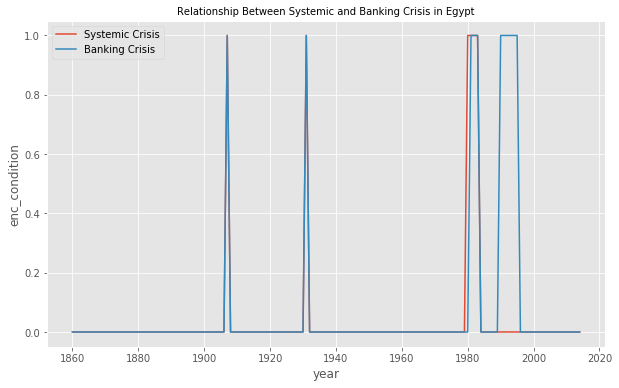

In [11]:
sns.lineplot(data=egypt, x='year', y='systemic_crisis')
sns.lineplot(data=egypt, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Egypt", fontsize=10)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]),
 <a list of 155 Text xticklabel objects>)

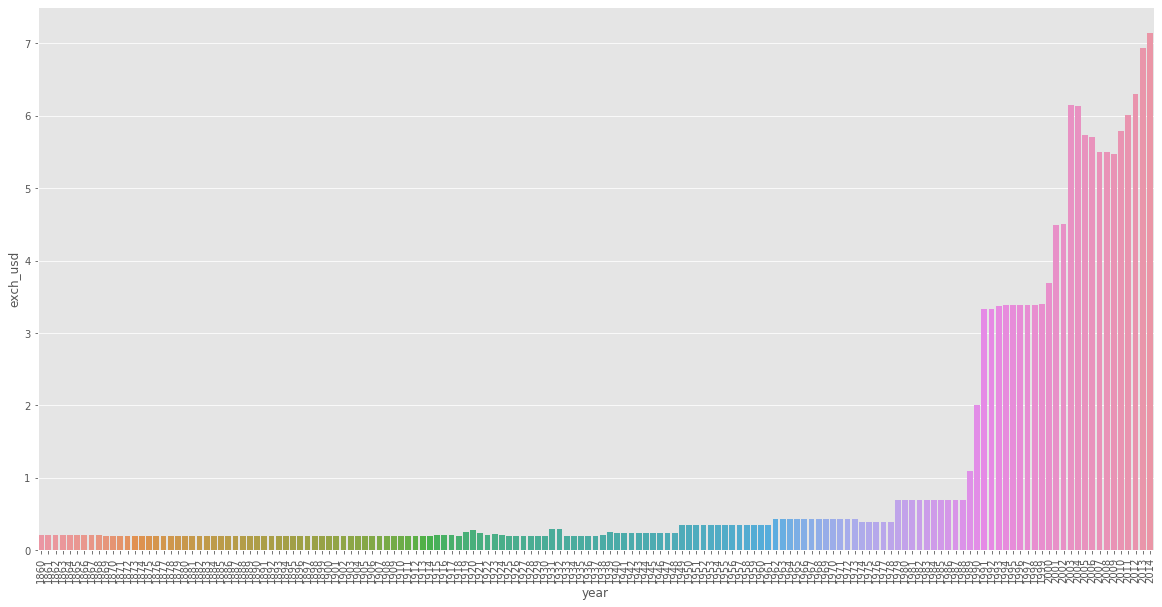

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(data=egypt, x='year', y='exch_usd')
plt.xticks(rotation=90)

### South Africa

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in South Africa')

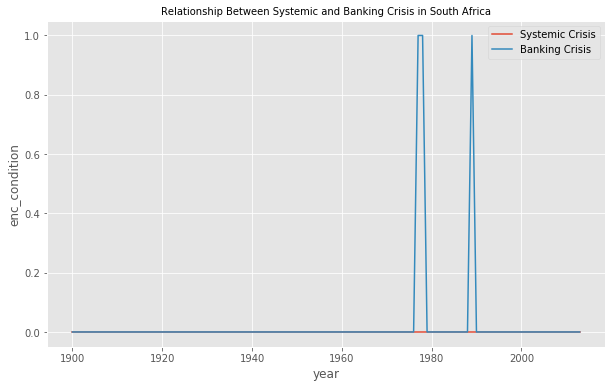

In [13]:
sns.lineplot(data=sa, x='year', y='systemic_crisis')
sns.lineplot(data=sa, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in South Africa", fontsize=10)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text xticklabel objects>)

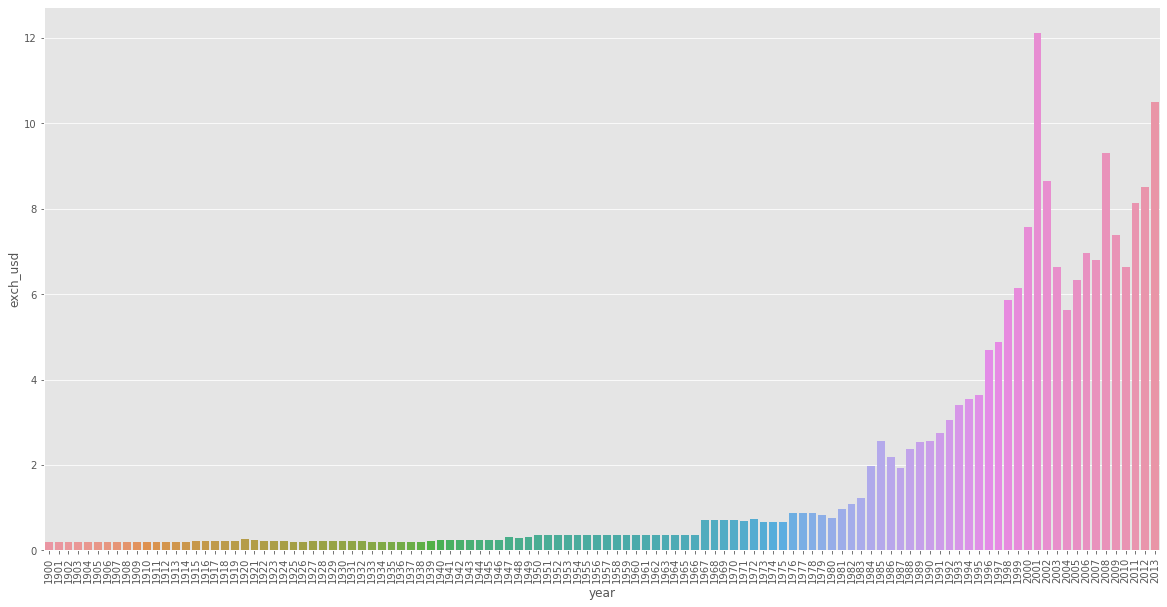

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(data=sa, x='year', y='exch_usd')
plt.xticks(rotation=90)

The banking crisis that initially occured made no impact on the exchange rate of the currency of South Africa. However, the second banking crisis led to a slight increase in the exchange rate.

## Zimbabwe

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Zimbabwe')

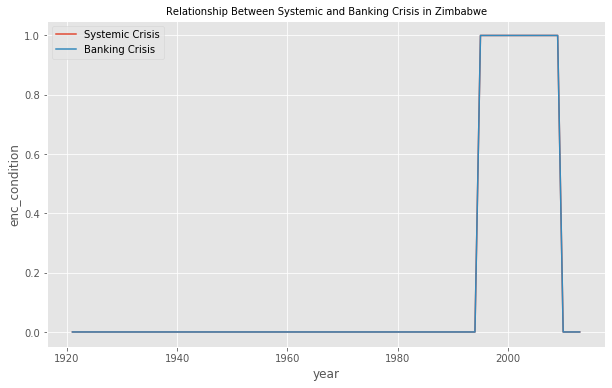

In [21]:
sns.lineplot(data=zimb, x='year', y='systemic_crisis')
sns.lineplot(data=zimb, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Zimbabwe", fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 <a list of 90 Text xticklabel objects>)

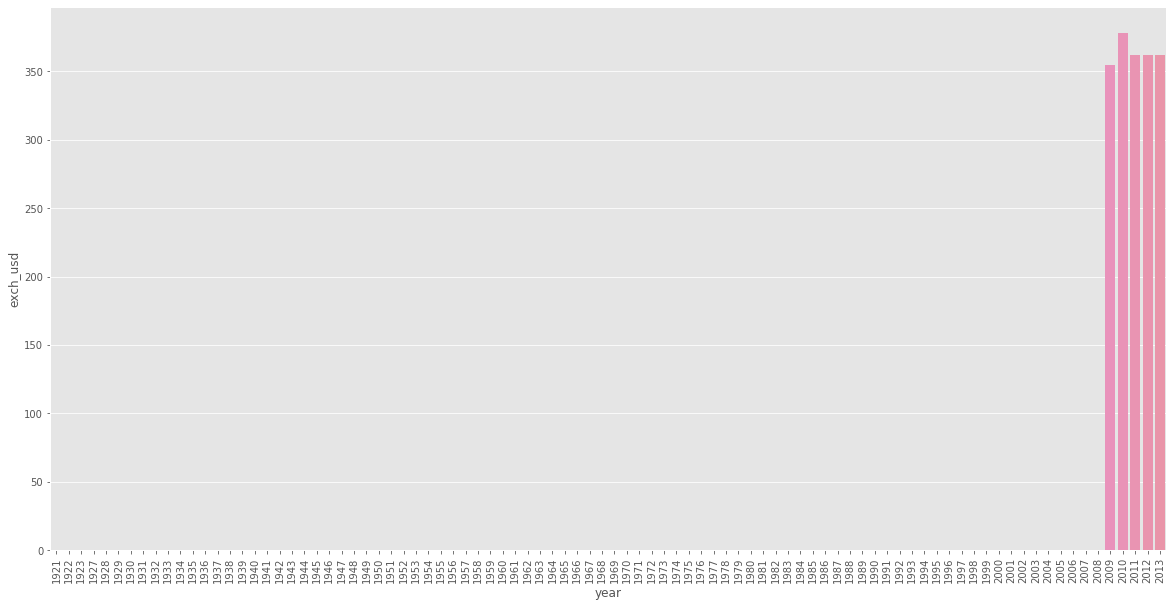

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(data=zimb, x='year', y='exch_usd')
plt.xticks(rotation=90)

## Algeria

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Algeria')

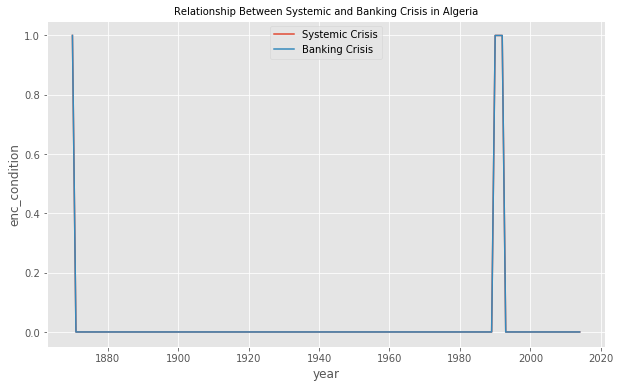

In [23]:
sns.lineplot(data=algeria, x='year', y='systemic_crisis')
sns.lineplot(data=algeria, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Algeria", fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text xticklabel objects>)

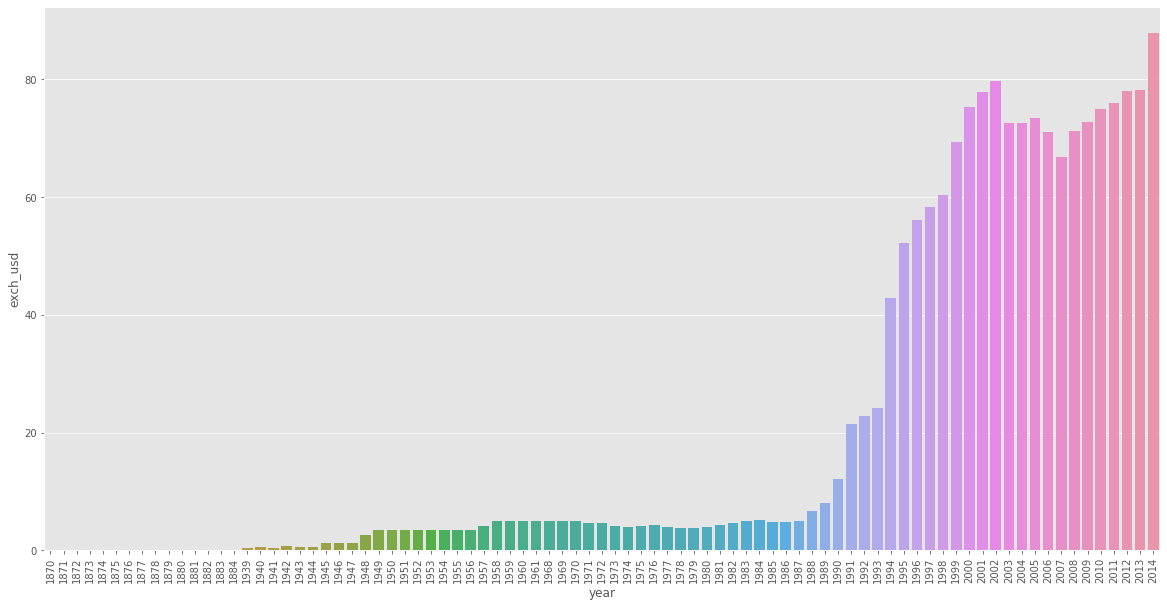

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data=algeria, x='year', y='exch_usd')
plt.xticks(rotation=90)

## Angola

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Angola')

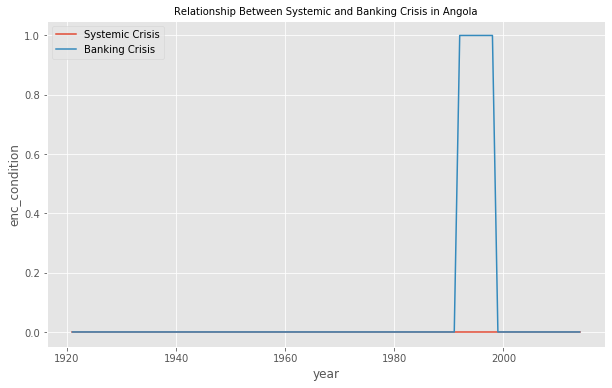

In [16]:
sns.lineplot(data=angola, x='year', y='systemic_crisis')
sns.lineplot(data=angola, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Angola", fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

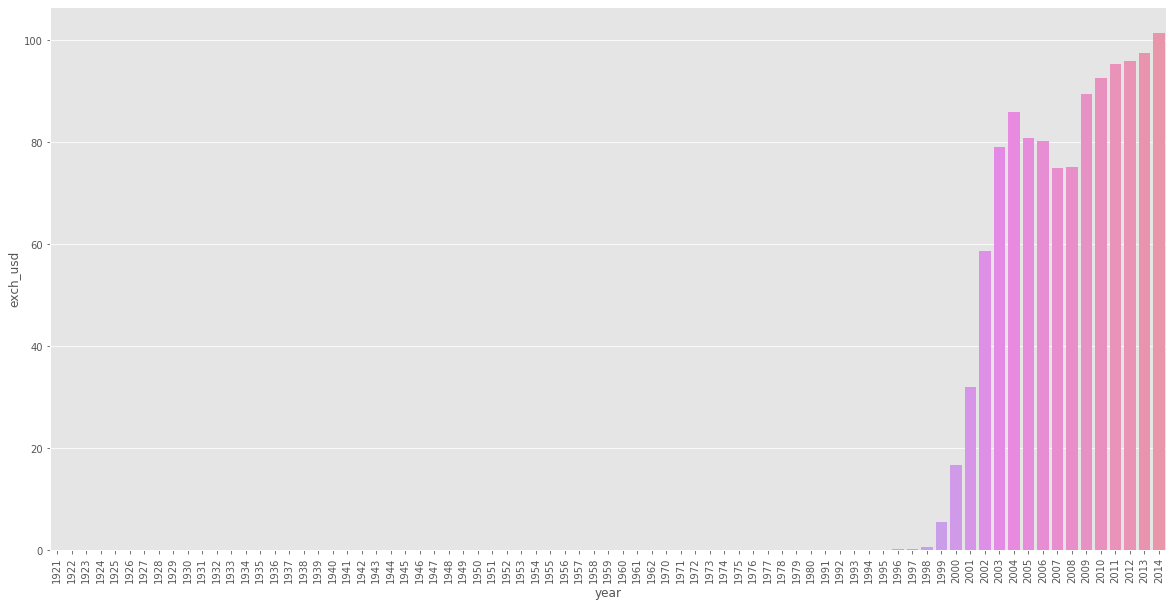

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(data=angola, x='year', y='exch_usd')
plt.xticks(rotation=90)

## Tunisia

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Tunisia')

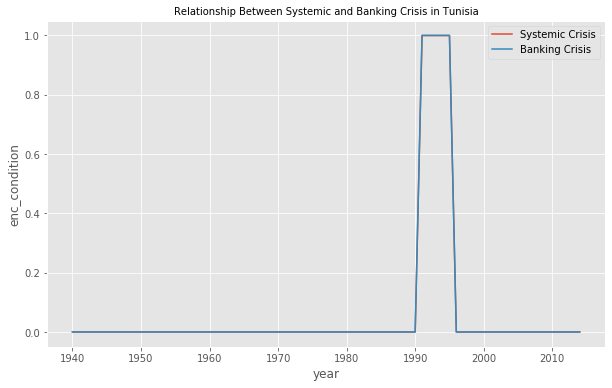

In [11]:
sns.lineplot(data=tunisia, x='year', y='systemic_crisis')
sns.lineplot(data=tunisia, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Tunisia", fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <a list of 75 Text xticklabel objects>)

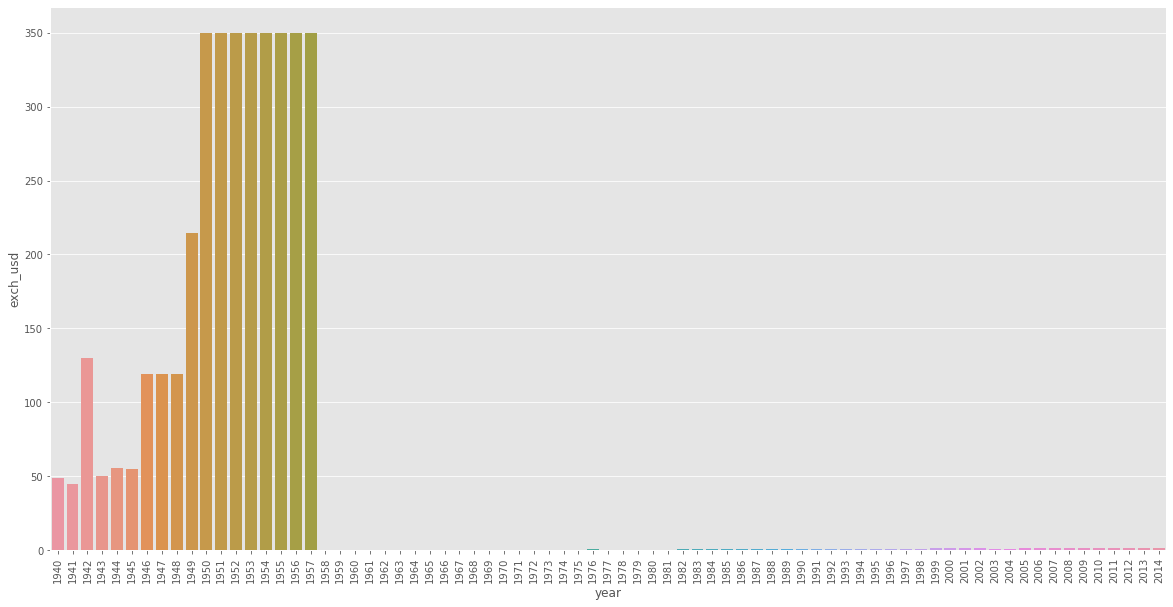

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(data=tunisia, x='year', y='exch_usd')
plt.xticks(rotation=90)

The banking and systemic crisis experienced in Tunisia did not affect the exchange rate of their currency as the increase came in a period where there was no crisis.

## MOROCCO

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Morroco')

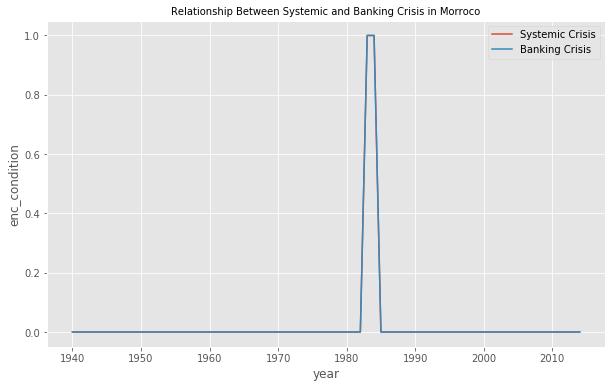

In [29]:
sns.lineplot(data=maroc, x='year', y='systemic_crisis')
sns.lineplot(data=maroc, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Morroco", fontsize=10)

Morroco also had a banking crisis all through the period she had a systemic crisis. This supports our hypothesis that banking crisis may not necessarily lead to systemic crises.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <a list of 75 Text xticklabel objects>)

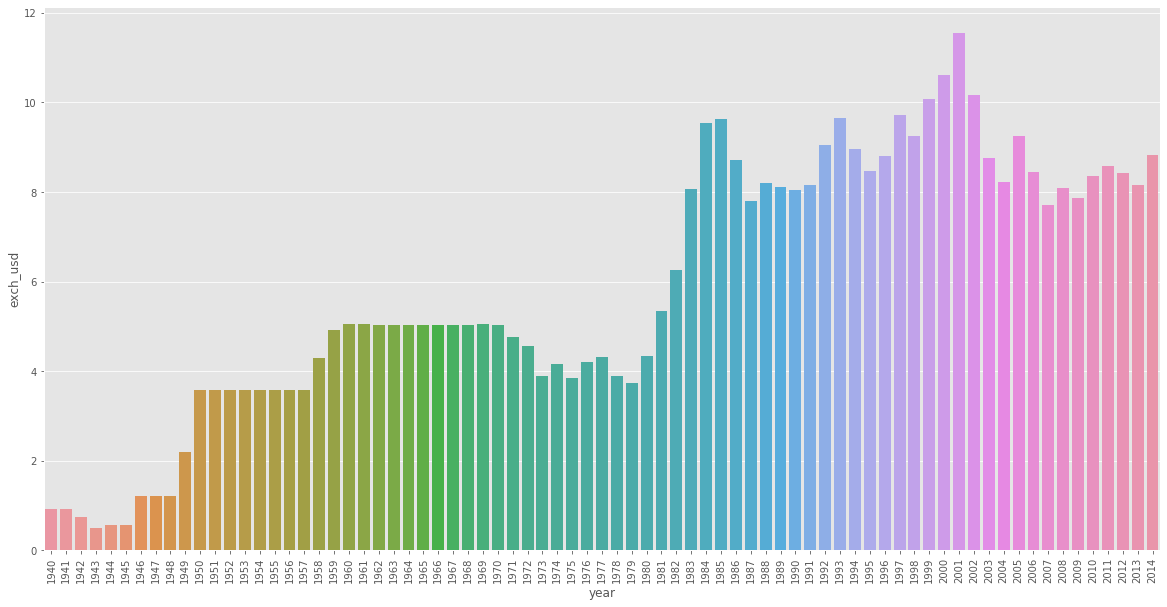

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(data=maroc, x='year', y='exch_usd')
plt.xticks(rotation=90)

The exchange rate was already being affected before the banking and systemic crisis occurred and it increased slightly more during the crisis. Therefore the 

## ZAMBIA

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Zambia')

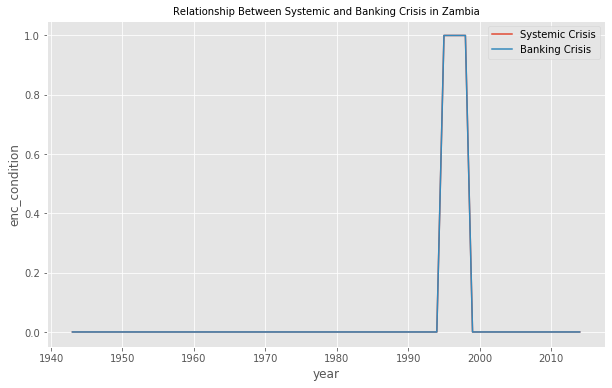

In [30]:
sns.lineplot(data=zam, x='year', y='systemic_crisis')
sns.lineplot(data=zam, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Zambia", fontsize=10)

Zambia had a banking crisis during the same period she had a systemic crisis. This supports our hypothesis that banking crisis may not necessarily lead to systemic crisis.

## MAURITIUS

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Mauritius')

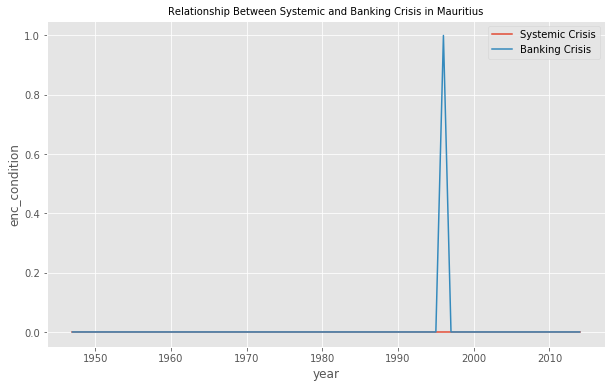

In [20]:
sns.lineplot(data=mau, x='year', y='systemic_crisis')
sns.lineplot(data=mau, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Mauritius", fontsize=10)

Mauritius had a banking crisis without a systemic crisis. This supports our hypothesis that banking crisis may not necessarily lead to systemic crises.

## KENYA

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Kenya')

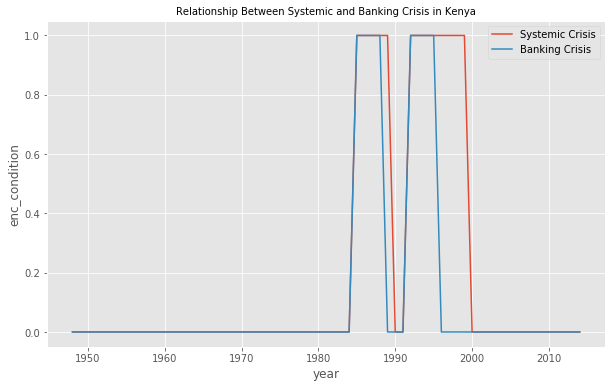

In [32]:
sns.lineplot(data=kenya, x='year', y='systemic_crisis')
sns.lineplot(data=kenya, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Kenya", fontsize=10)

The plot shows that whenever there is a banking crisis and systemic crisis started and continued at the same time until they started happening side by side with banking crisi leading to corresponding systemic crisis. This also supports our hypothesis that banking crisis leads to sysytemic crisis.

## IVORY COAST

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Ivory Coast')

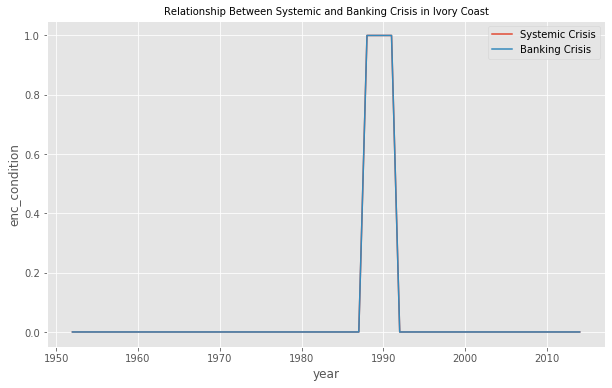

In [33]:
sns.lineplot(data=ivory, x='year', y='systemic_crisis')
sns.lineplot(data=ivory, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Ivory Coast", fontsize=10)

Ivory coast had a banking crisis during the same period she had a systemic crisis. This supports our hypothesis that banking crisis may not necessarily lead to systemic crisis.

## NIGERIA

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Nigeria')

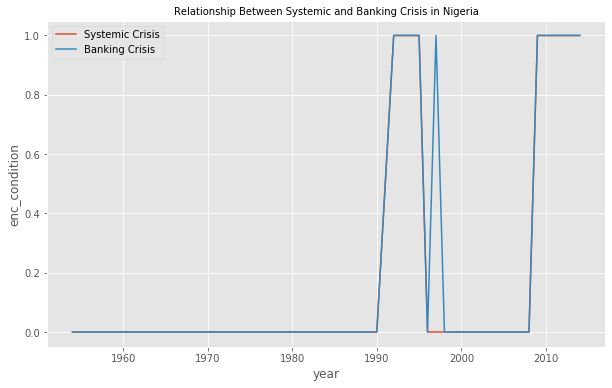

In [35]:
sns.lineplot(data=naija, x='year', y='systemic_crisis')
sns.lineplot(data=naija, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Nigeria", fontsize=10)

Nigeria had a banking crisis at the time she had a systemic crisis and in the middile of it, had a banking crisis without a systemic crisis. This supports our hypothesis that banking crisis may not necessarily lead to systemic crisis.

## CENTRAL AFRICAN REPUBLIC

Text(0.5, 1.0, 'Relationship Between Systemic and Banking Crisis in Central African Republic')

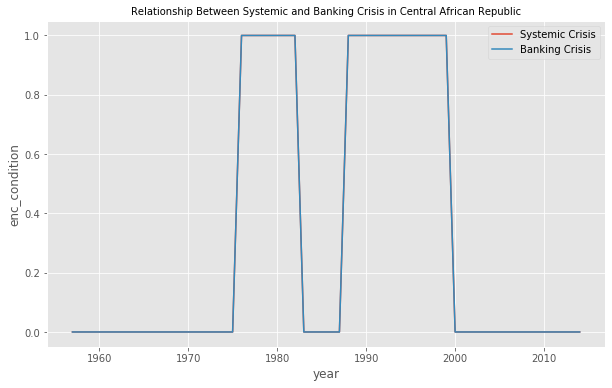

In [36]:
sns.lineplot(data=car, x='year', y='systemic_crisis')
sns.lineplot(data=car, x='year', y='enc_condition')
plt.legend(["Systemic Crisis", "Banking Crisis"], prop={'size': 10})
plt.title("Relationship Between Systemic and Banking Crisis in Central African Republic", fontsize=10)

Central African Republic had a banking crisis all through the same period she had a systemic crisis. This supports our hypothesis that banking crisis may not necessarily lead to systemic crisis.